In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("/content/train.csv")

In [ ]:
# 결측치 파악
df.isnull().sum().to_frame('nan_count')

In [34]:
df

,date,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),year_month
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01
1,2016-01-02,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0,2016-01
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01
3,2016-01-04,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0,2016-01
4,2016-01-05,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,...,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0,2020-09
1729,2020-09-25,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,...,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0,2020-09
1730,2020-09-26,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,...,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0,2020-09
1731,2020-09-27,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,...,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0,2020-09


In [29]:
df = df.drop(['요일'], axis=1)

In [32]:
# date column 바꾸기
## 월 단위 다운 샘플링 함수를 정의
def month_resampling(df):
    new_data = pd.DataFrame() 
    # 년도와 월을 합친 변수를 생성합니다.
    df['year_month'] = df['date'].str.slice(stop=7)
    # 데이터의 전체 기간을 추출합니다.
    year_month = df['year_month'].drop_duplicates()
    # 상점 아이디별로 월 단위 매출액 총합을 구합니다.
    downsampling_data = df.groupby(['year_month']).sum()
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False,inplace=False)
    
        
    return downsampling_data

In [35]:
df = month_resampling(df)

In [ ]:
df

In [41]:
def time_series(df, i):
    ## 날짜 지정 범위는 영업 시작 월부터 2019년 3월 전까지 영업 마감일 기준
    index = pd.date_range(min(df['year_month']),'2020-10',freq='BM') 
    ## 시리즈 객체로 변환
    ts = pd.Series(df[i].values,index=index)
    return ts

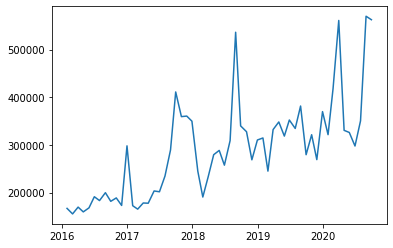

In [53]:
pum = time_series(df, "건고추_가격(원/kg)")
plt.plot(pum)
    # plt.legend()

# EDA
1. 야채별 평균 거래량과 가격
2. 평균 거래량과 평균 가격의 차이
3. 야채별 시계열 분석

In [22]:
# 1. 야채별 평균 거래량과 가격
unique_pum = [
        '배추', '무', '양파', '건고추','마늘',
        '대파', '얼갈이배추', '양배추', '깻잎',
        '시금치', '미나리', '당근',
        '파프리카', '새송이', '팽이버섯', '토마토',
        '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇'
    ]

# df["배추_거래량(kg)"][1]
# df = ''
def pum_kg(pum):
  pum_df = pd.DataFrame() 
  for i in enumerate(df['배추_거래량(kg)']):
    pum_df['시간'] = df['date'][i]
    pum_df['거래량'] = df[f'{pum}_거래량(kg)'][i]
    

In [24]:
pum_kg("배추")

KeyError: ignored